In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

from gproc.generative import sample_at_x
from gproc.plotting import contour_2d
from gproc.kernels import squared_exponential
from gproc.laplace import laplace_approximation_probit, chol_inverse

In [42]:
N = 50

# x = np.random.uniform(-1, 1, N).reshape(-1, 1) # Reshape to N x 1 matrix
x = np.linspace(-1, 1, N).reshape(-1, 1) # Reshape to N x 1 matrix
y, prob_y, f = sample_at_x(x, kernel_params={'lengthscale': 0.5, 'variance': 1.})

In [43]:
gram = squared_exponential(x, x, lengthscale=0.005)

In [44]:
approx_f, laplace_cov, objective_history, converged = laplace_approximation_probit(y, gram)

print(f'Converged: {converged}')

Converged: True


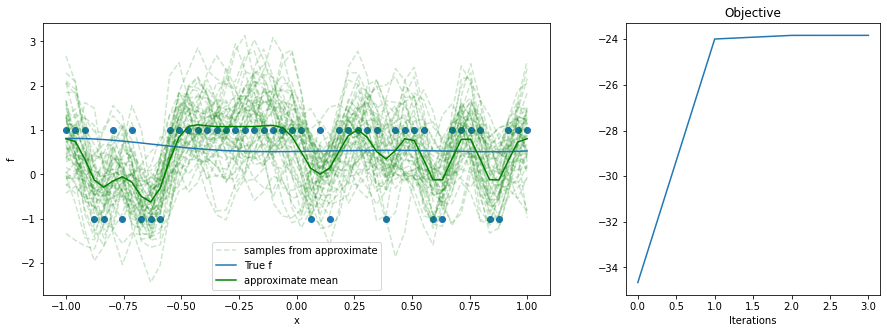

In [45]:
sort_ix = np.argsort(x.reshape(-1))

fig, axarr = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 1]})

axarr[1].set_title('Objective')
axarr[1].plot(objective_history)
axarr[1].set_xlabel('Iterations')

n_samples = 50
axarr[0].plot(x[sort_ix], f_samp[sort_ix], alpha=0.2, c='g', linestyle='--', label='samples from approximate')
for samp in range(n_samples - 1):
    f_samp = np.random.multivariate_normal(approx_f, laplace_cov)
    axarr[0].plot(x[sort_ix], f_samp[sort_ix], alpha=0.2, c='g', linestyle='--')
    
axarr[0].scatter(x, y)
axarr[0].set_xlabel('x')
axarr[0].set_ylabel('f')
axarr[0].plot(x[sort_ix], f[sort_ix], label='True f')
axarr[0].plot(x[sort_ix], approx_f[sort_ix], c='g', label='approximate mean')   
axarr[0].legend()
plt.show()

In [ ]:
N_new = 10
new_x = np.random.uniform(-1, 1, N_new).reshape(-1, 1) # Reshape to N x 1 matrix

gram = squared_exponential(x, new_x, lengthscale=0.005)